In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
combine_df.groupby('city', sort=False).first().reset_index().head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

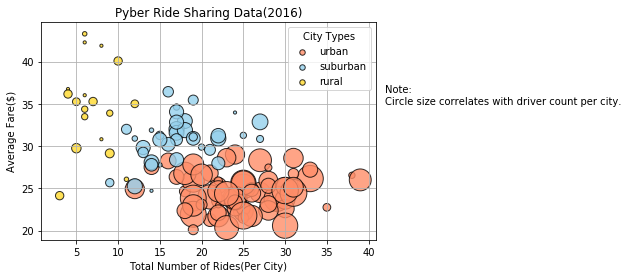

In [2]:
# Obtain the x and y coordinates for each of the three city types
city_group = combine_df.groupby(['type', 'city'])

urban_total_rides = city_group['city'].count()['Urban']
suburban_total_rides = city_group['city'].count()['Suburban']
rural_total_rides = city_group['city'].count()['Rural']

urban_avg_fare = city_group['fare'].mean()['Urban']
suburban_avg_fare = city_group['fare'].mean()['Suburban']
rural_avg_fare = city_group['fare'].mean()['Rural']

urban_drive_count = city_group['driver_count'].mean()['Urban']
suburban_drive_count = city_group['driver_count'].mean()['Suburban']
rural_drive_count = city_group['driver_count'].mean()['Rural']

# Build the scatter plots for each city types
urban = plt.scatter(urban_total_rides, urban_avg_fare, s=10*urban_drive_count, label='urban', facecolors="#ff8d68", edgecolors='k', alpha=0.8)
suburban = plt.scatter(suburban_total_rides, suburban_avg_fare, s=10*suburban_drive_count, label='suburban', facecolors="#95d1ed", edgecolors='k', alpha=0.8)
rural = plt.scatter(rural_total_rides, rural_avg_fare, s=10*rural_drive_count, label='rural', facecolors="#ffda2d", edgecolors='k', alpha=0.8)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
legend = plt.legend(handles=[urban,suburban,rural], markerscale=1, title="City Types", prop={'size': 10})
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Image/ride_sharing_data.png")
plt.show()

## Total Fares by City Type

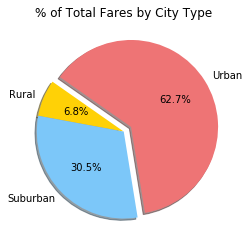

In [3]:
# Calculate Type Percents
total_fares = combine_df.groupby('type')['fare'].sum()
colors = ["#ffd106", "#7cc7f9", "#ee7475"]
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(total_fares, explode=explode, autopct='%.1f%%', colors=colors, labels=labels, shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Image/total_fares_by_city_type.png")
plt.show()

## Total Rides by City Type

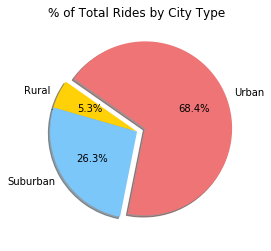

In [4]:
# Calculate Ride Percents
total_rides = combine_df.groupby('type')['ride_id'].count()
colors = ["#ffd106", "#7cc7f9", "#ee7475"]
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(total_rides, explode=explode, autopct='%.1f%%', colors=colors, labels=labels, shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Image/total_rides_by_city_type.png")
plt.show()

## Total Drivers by City Type

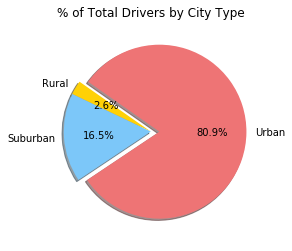

In [5]:
# Calculate Driver Percents
driver_df = combine_df.groupby('city', sort=False).first().reset_index()
total_drivers = driver_df.groupby('type')['driver_count'].sum()
colors = ["#ffd106", "#7cc7f9", "#ee7475"]
labels = ["Rural", "Suburban", "Urban"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(total_drivers, explode=explode, autopct='%.1f%%', colors=colors, labels=labels, shadow=True, startangle=145)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Image/total_drivers_by_city_type.png")
plt.show()